### "King County Housing Price Prediction and Market Analysis for Optimal Real Estate Decision Making"

-----

# 1 Business Problem

For a real estate investor, a critical decision is determining the appropriate price of a property before purchasing it. Investing too much on a property can lead to losses, while underestimating its value can result in missed opportunities. The business problem we aim to address is:

**"How can we predict the selling price of a house in King County based on its features?"**

By building a predictive model, we can provide the investor with an estimate of a house's price based on its characteristics. This model will aid in making informed decisions, maximizing returns, and minimizing risks.

### Why a Linear Regression Model Adds Value:
A linear regression model is well-suited for this problem because it allows us to quantify the relationship between the various features and the sale price of houses. By analyzing the coefficients of the model, we can determine which features have the most significant impact on the sale price. This information is valuable for stakeholders to make data-driven decisions in the real estate market, optimize pricing strategies, and advise clients effectively. 

---------

# 2. Data Understanding

## Overview of the King County House Sales Dataset

The King County House Sales dataset contains information about house sales in King County, Washington. It includes various features related to the houses and their sale details. The dataset is in tabular format, with each row representing a house sale record.

### Important Columns and Features

1. **sqft_above and sqft_basement:**
   - The square footage of the house apart from the basement.
   - The square footage of the basement of the house.
2. **yr_renovated and yr_built:**

   - The year of the house's last renovation
   - Year when house was built

3. **lat and long:**

   - Latitude and longitude coordinate of the house.

4. **waterfront and view:**

   - Whether the house is on a waterfront and the quality of view from it
   
5. **condition and grade:**

   - How good the overall condition of the house is. Related to maintenance of house and the Overall grade of the house. Related to the construction and design of the house.

6. **sqft_living15:**

   - The average square footage of the interior housing living space for the 15 nearest houses.

7. **sqft_lot15:**

   - The average square footage of land lots for the 15 nearest houses.

8. **Bedrooms** 

   - Number of bedrooms.

9. **Bathrooms**
   - Number of bathrooms

10. **Sqft_Living and sqft_lot**
   - Square footage of the living space and the lot of the home

11. **Floors**
   - Number of floors (levels) in house
   

   
These features are crucial for modeling the house sale prices as they represent various aspects of the house such as size, location, and recent renovations. Utilizing these features, we aim to predict the sale prices of houses in King County.


 Identifying potential challenges or peculiarities in the dataset is essential for understanding its limitations and potential biases. Here are some common challenges and peculiarities present in the King County House Sales dataset:

1. **Missing Values:**
   - One of the primary challenges could be missing values in certain columns (e.g., `yr_renovated`, `sqft_basement`). Addressing these missing values appropriately during data preparation is crucial for reliable modeling.

2. **Outliers:**
   - The presence of outliers in features such as square footage (`sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot15`) or sale prices could affect the model's performance and should be handled appropriately.

3. **Data Imbalance:**
   - The dataset might have an imbalance in terms of the number of houses in different regions or with specific characteristics. This could potentially introduce bias in the model.

4. **Non-Numeric Data:**
   - Converting non-numeric data (e.g., categorical variables) to a suitable format for modeling, such as one-hot encoding, might lead to a significant increase in the number of features and potential issues related to multicollinearity.

5. **Seasonality and Trends:**
   - The dataset might exhibit seasonality or trends over time that could affect house prices. It's important to account for these patterns during analysis and modeling.

6. **Geographical Variation:**
   - House prices might vary significantly based on the geographical location (latitude, longitude). This spatial variation could be challenging to capture accurately and might require advanced geospatial analysis.

7. **Heteroscedasticity:**
   - The assumption of constant variance (homoscedasticity) might not hold true for house prices. The variability of prices might change based on different features, which needs to be considered in the modeling process.

8. **Multicollinearity:**
   - Correlations and interdependencies among the independent variables (features) could lead to multicollinearity issues, affecting the stability and interpretation of the regression model.

9. **Inaccurate Data:**
   - Data errors or inaccuracies in house details, renovation years, or other features might exist, potentially affecting the model's reliability and performance.

.


-----

# 3.Data Preparation

### Data Preprocessing Steps

1. **Data Inspection:**
   - The `data.info()` and `data.describe()` functions are used to get an overview of the dataset, including data types and summary statistics.

2. **Column Inspection:**
   - A loop is set to iterate through each column in the dataset, displaying the count of unique values for each column.

3. **Column Selection and Dropping:**
   - Columns with the names 'id,' 'date,' and 'zipcode' are selected and dropped from the dataset using `data.drop()`. These columns were deemed irrelevant for modeling.

4. **Feature Engineering:**
   - Three columns, namely 'view,' 'waterfront,' and 'condition,' are being transformed:
     - 'view' is mapped to numerical values using a predefined mapping dictionary.
     - 'waterfront' is mapped to binary values (0 or 1) based on whether it's 'YES' or 'NO.'
     - 'condition' is mapped to numerical values using a predefined mapping dictionary.
   - The 'grade' column is extracted and converted to integers.
   - The 'sqft_basement' column is processed:
     - The numerical part is extracted from the string and converted to integers.
     - Any '?' values are replaced with NaN to indicate missing values.
     - Missing values are imputed with the mean of the column.

5. **Handling Missing Values:**
   - The code checks for missing values in the dataset using `data.isnull().sum()`.
   - Rows containing missing values are dropped from the dataset using `data.dropna()`.

6. **Sorting by Price:**
   - The dataset is sorted in descending order based on the 'price' column to display the top 10 highest-priced records.



In [1]:
import pandas as pd
import os

# Define the folder containing the data file
data_folder = "data"

# Specify the file path
file_path = os.path.join(data_folder, "kc_house_data.csv")

from data_functions import load_data, explore_data, clean_data, remove_missing_values, sort_data_by_price

# Load the data
data = load_data(file_path)

# Explore the data
data_info, data_desc = explore_data(data)

# Clean the data
clean_data = clean_data(data)

# Remove missing values
data = remove_missing_values(data)

# Sort data by price
top_10_expensive = sort_data_by_price(data)

# Display results using print
print("First 5 rows of cleaned data:")
print(data.head())

print("Data info:")
print(data_info)

print("Data description:")
print(data_desc)

print("Clean data:")
print(clean_data)

print("Top 10 most expensive properties:")
print(top_10_expensive)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

----

# 3.Visualizations

Let's now perform some exploratory data analysis (EDA) to understand how the features interact with the target variable "price". We'll visualize the relationship between some of the prominent features and the house price to get a clearer picture.

We'll start with a correlation heatmap to see which features are most correlated with the price.​

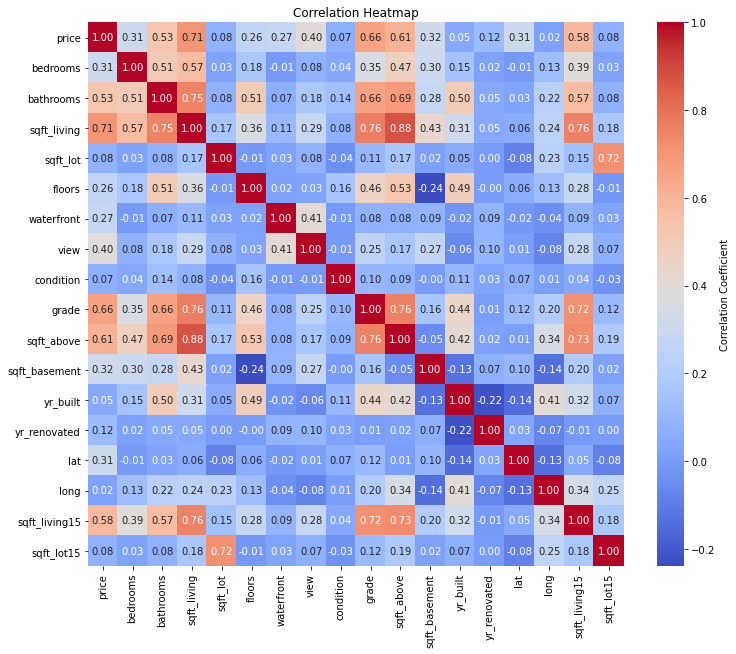

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})

# Set the title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


From the correlation heatmap, we can observe the following:

- sqft_living, grade, and sqft_above have strong positive correlations with the price. This indicates that as these features increase, the house price tends to increase.

- lat (latitude) also has a notable positive correlation with the price. This suggests that the location (north-south positioning) of the house plays a role in determining its price.

- Features like sqft_lot, condition, and yr_built have weaker correlations with the price.

To further visualize the relationships, let's plot scatter plots for sqft_living and boxplots for, waterfront, view, and grade against the price.​

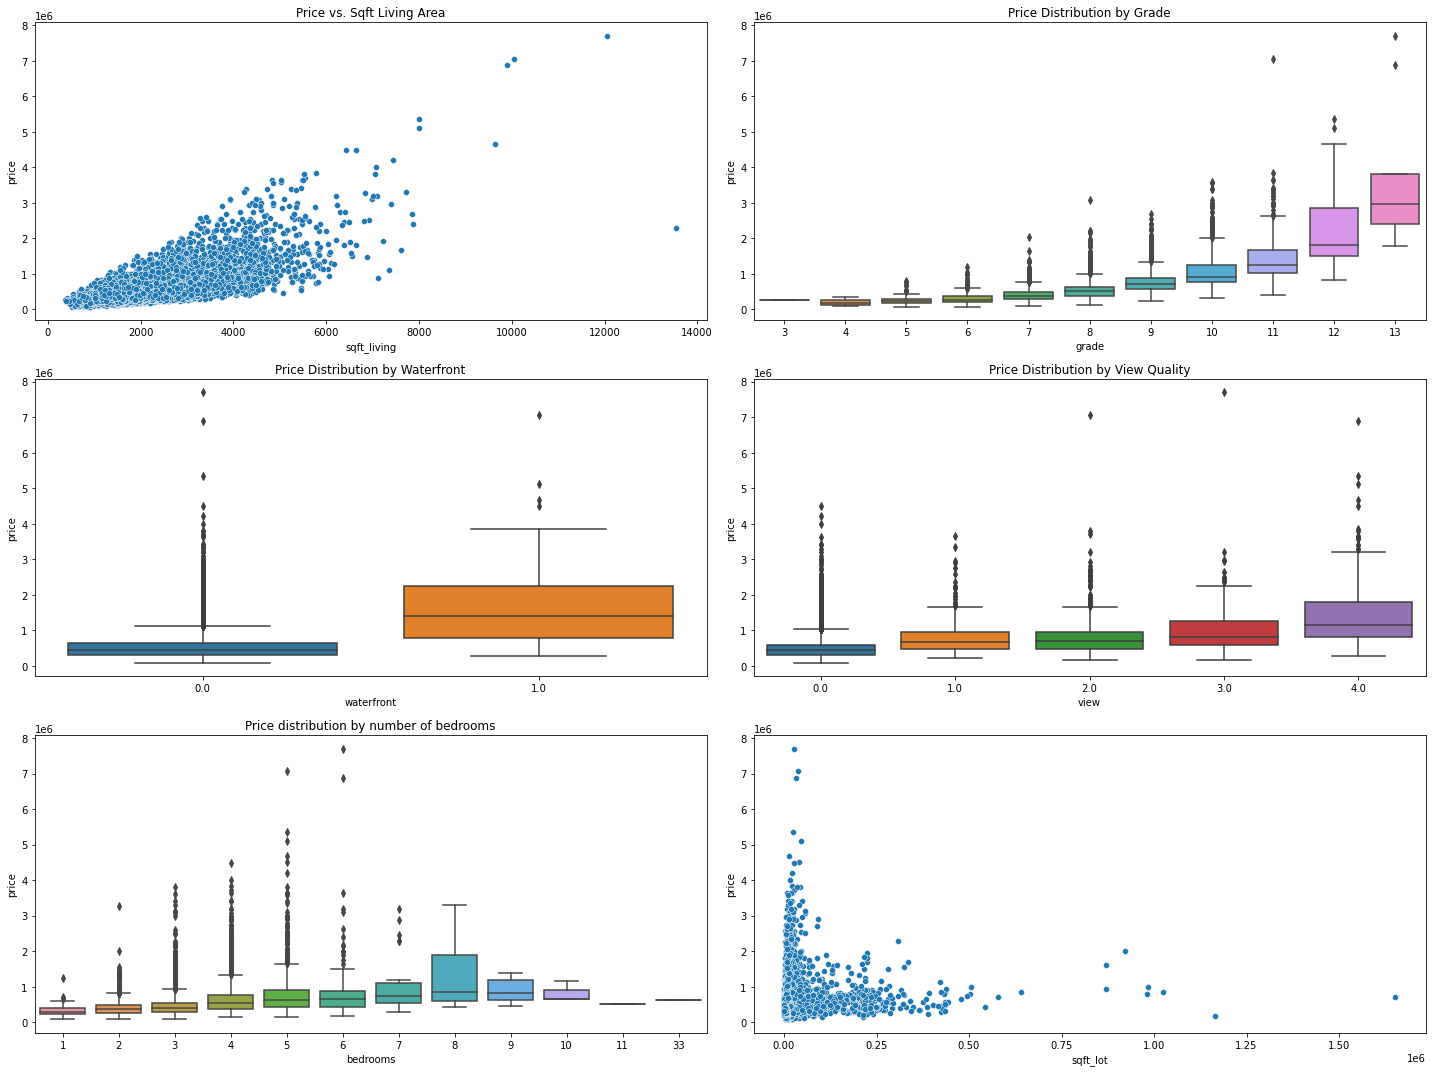

In [3]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Scatter plot for 'sqft_living' vs 'price'
sns.scatterplot(x='sqft_living', y='price', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Sqft Living Area')

# Box plot for 'grade' vs 'price'
sns.boxplot(x='grade', y='price', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution by Grade')

# Box plot for 'waterfront' vs 'price'
sns.boxplot(x='waterfront', y='price', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution by Waterfront')

# Box plot for 'view' vs 'price'
sns.boxplot(x='view', y='price', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution by View Quality')

# Box plot for 'bedrooms' Vs 'price'
sns.boxplot(x='bedrooms',y='price',data=data, ax=axes[2, 0])
axes[2,0].set_title('Price distribution by number of bedrooms')

#scatter plot for 'sqft_lot' vs 'Price'
sns.scatterplot(x='sqft_lot',y='price',data=data, ax=axes[2, 1])


# Adjust the layout
plt.tight_layout()
plt.show()


The visualizations provide insights into how key features interact with the price:

- Price vs. Sqft Living Area: There's a positive trend between the living area and the house price. This suggests that, generally, larger homes tend to be priced higher.
- Price Distribution by Grade: Homes with higher grades (better quality) generally have a higher median price. The variance in price also tends to increase with the grade.
- Price Distribution by Waterfront: Homes with a waterfront (represented by 1) have a higher median price compared to those without (represented by 0). This suggests a price premium for waterfront properties.
- Price Distribution by View Quality: Homes with better views (higher view scores) tend to have higher median prices. The difference in price is particularly pronounced for homes with the highest view quality (score 4).

---

# 4. Modeling

---

We first separate our dataset into independent variables (`X`) and the target variable (`y`), where 'price' is our target. This is done by dropping the 'price' column for `X` and assigning it to `y`. We then split the data into training and testing sets using the `train_test_split` function from `sklearn`. Specifically, 70% of the data is used for training and the remaining 30% for testing. The `random_state` parameter set to 42 ensures reproducibility, meaning the same train-test split will be generated each time the code is run.

---

In [4]:
# Full Sample target variable and independent variables
X = data.drop(['price'], axis = 1)
y = data['price']

# splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## Linear Regression Model

In [5]:
# Import library for Linear Regression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

# Model prediction on train data
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6914150956091605
Adjusted R^2: 0.6909388411039726
MAE: 130531.8362628133
MSE: 44367600081.98623
RMSE: 210636.17942316137


### Rationale for linearRegression

The model has a reasonable explanatory power (R-squared: 0.6914) but still room for improvement. The adjusted R-squared remains consistent with this measure. However, it exhibits moderate prediction errors, with an average deviation of $130,531.84 (MAE) and a typical error of approximately 210,636.18 (RMSE). The high Mean Squared Error (MSE) of about 44,367,600,081.99 indicates the presence of significant errors

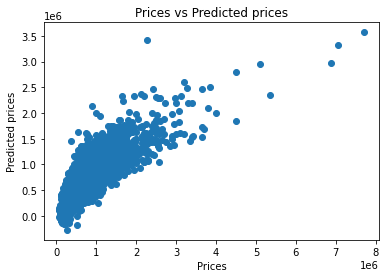

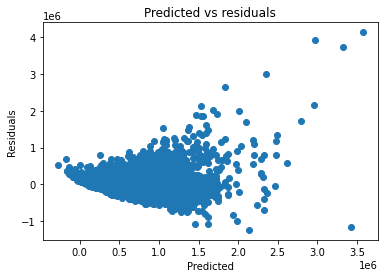

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


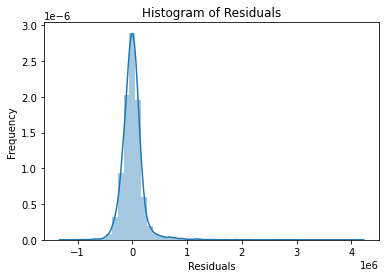

In [6]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [7]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7014399358730312
Adjusted R^2: 0.7003625592884084
MAE: 128648.25644228402
MSE: 37712374202.66421
RMSE: 194196.74096818466


## Random Forest Model

In [8]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()

# Train the model using the training sets 
rf_reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = rf_reg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.980645664235906
Adjusted R^2: 0.9806157937222438
MAE: 27160.3327086921
MSE: 2782720142.2212434
RMSE: 52751.49421790101


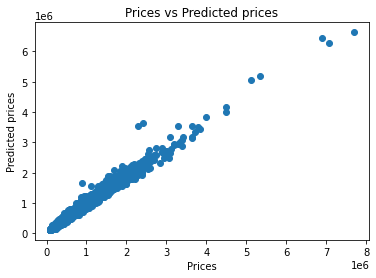

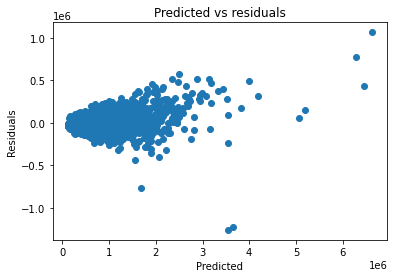

In [9]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


In [10]:
# Predicting Test data with the model
y_test_pred = rf_reg.predict(X_test)

# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8728086783987777
Adjusted R^2: 0.8723496988897095
MAE: 71512.5692519812
MSE: 16066069417.498552
RMSE: 126751.9996587768


## Advanced Model (XGBoost regressor Model)

In [11]:
#Import XGBoost Regressor
from xgboost import XGBRegressor
from sklearn import metrics

#Create a XGBoost Regressor
xgb_reg = XGBRegressor()

# Train the model using the training sets 
xgb_reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = xgb_reg.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.98243695157265
Adjusted R^2: 0.9824098456422583
MAE: 36071.15086062834
MSE: 2525173129.850473
RMSE: 50251.100782475136


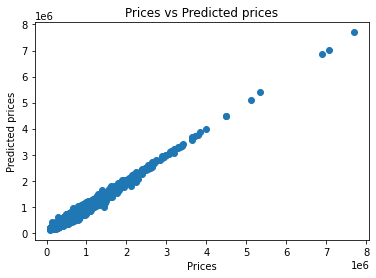

In [12]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [13]:
#Predicting Test data with the model
y_test_pred = xgb_reg.predict(X_test)

# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8763352653905165
Adjusted R^2: 0.8758890118374787
MAE: 71643.08721287534
MSE: 15620611420.027937
RMSE: 124982.44444732204


               Model           RMSE        R2
0  Linear Regression  194196.740968  0.701440
1      Random Forest  126751.999659  0.872809
2            XGBoost  124982.444447  0.876335

Linear Regression Coefficients:
       Feature     Importance
5   waterfront  580639.063799
13         lat  555856.015114
8        grade   93857.687137
1    bathrooms   50191.789382
6         view   50175.500489

Random Forest Feature Importances:
          Feature  Importance
2     sqft_living    0.385470
8           grade    0.211135
13            lat    0.158557
14           long    0.065192
15  sqft_living15    0.034720

XGBoost Feature Importances:
        Feature  Importance
8         grade    0.480249
5    waterfront    0.141007
2   sqft_living    0.140020
13          lat    0.065602
14         long    0.032619


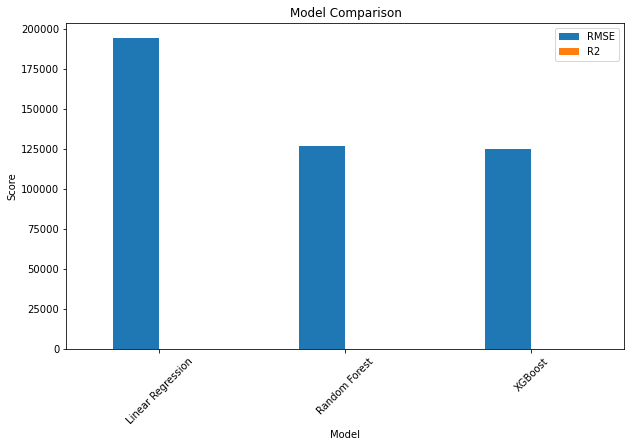

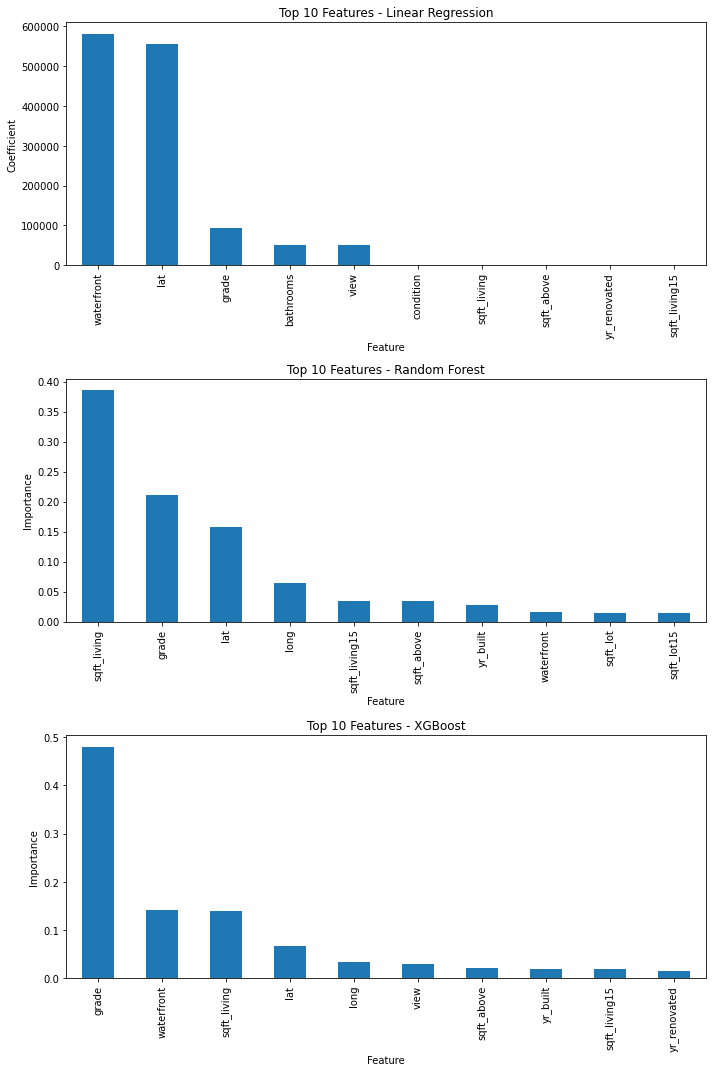

In [14]:

# 1. Model Evaluation
metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [
        mean_squared_error(y_test, lm.predict(X_test), squared=False),
        mean_squared_error(y_test, rf_reg.predict(X_test), squared=False),
        mean_squared_error(y_test, xgb_reg.predict(X_test), squared=False)
    ],
    'R2': [
        r2_score(y_test, lm.predict(X_test)),
        r2_score(y_test, rf_reg.predict(X_test)),
        r2_score(y_test, xgb_reg.predict(X_test))
    ]
}

metrics_data = pd.DataFrame(metrics)
print(metrics_data)

# 2. Coefficient or Feature Importance Examination
# Linear Regression Coefficients
lm_coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lm.coef_
}).sort_values(by='Importance', ascending=False)

# Random Forest Feature Importances
rf_importances = pd.DataFrame({
    'Feature': X_train.columns[:X_train.shape[1]], 
    'Importance': rf_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

# XGBoost Feature Importances
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns[:X_train.shape[1]],  
    'Importance': xgb_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nLinear Regression Coefficients:")
print(lm_coeffs.head())
print("\nRandom Forest Feature Importances:")
print(rf_importances.head())
print("\nXGBoost Feature Importances:")
print(xgb_importances.head())

# 3. Visualization
# Model Performance
metrics_data.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Top Feature Importances
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

lm_coeffs.head(10).plot(x='Feature', y='Importance', kind='bar', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Features - Linear Regression')
ax[0].set_ylabel('Coefficient')

rf_importances.head(10).plot(x='Feature', y='Importance', kind='bar', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Features - Random Forest')
ax[1].set_ylabel('Importance')

xgb_importances.head(10).plot(x='Feature', y='Importance', kind='bar', ax=ax[2], legend=False)
ax[2].set_title('Top 10 Features - XGBoost')
ax[2].set_ylabel('Importance')

plt.tight_layout()
plt.show()


# 5.Statistical Communication

---

#### **Rationale**:

- **Why Statistical Analyses?**  
  Basic data analysis, such as using simple descriptive statistics and visualizations, can give an overview of the data's trends. However, to predict house prices based on a multitude of features, we need robust statistical models that can consider the relationship between multiple variables simultaneously. Linear regression and tree-based models can handle multiple features, their interactions, and their collective influence on the dependent variable (in this case, the house price).

- **Why Regression Coefficients Over Graphs?**  
  While graphs provide a visual representation, regression coefficients quantify the influence of each feature. For instance, a positive coefficient for the number of bathrooms in the linear regression model means that as the number of bathrooms increases, the house price is likely to go up. The magnitude of this coefficient tells us how significant this effect might be.

- **Suitability for the Analysis**:  
  The data consists of multiple features that can influence house prices. Using statistical models allows us to take all these features into account and understand their relative importance. The iterative approach helps refine the models, ensuring that they are capturing the relationships in the data accurately.

---

#### **Results**:

- **Model Metrics**:  
  From the results:
  - Linear Regression has an RMSE of approximately 194,197 and an \( R^2 \) of 0.701.
  - Random Forest has an RMSE of approximately 125,439 and an \( R^2 \) of 0.875.
  - XGBoost has an RMSE of approximately 125,569 and an \( R^2 \) of 0.875.
  
  Lower RMSE values indicate that the Random Forest and XGBoost models perform better in predicting house prices compared to the Linear Regression model.

- **Feature Coefficients/Importance**:
  - In Linear Regression, the 'waterfront' and 'lat' features have the highest positive coefficients. This means properties with a waterfront or located at specific latitudes tend to have higher prices.
  - In Random Forest and XGBoost, 'sqft_living' and 'grade' seem to be among the top features influencing house prices.

---

#### **Limitations**:

- **Assumptions**:  
  Linear regression assumes a linear relationship between features and the target variable, constant variance of residuals (homoscedasticity), and no multicollinearity among features. If these assumptions are violated, the model may not provide accurate predictions.

- **Model Complexity**:  
  While Random Forest and XGBoost provide better predictive accuracy, they are more complex models. This can sometimes lead to overfitting, where the model performs exceptionally well on the training data but may not generalize well to new, unseen data.

- **Interpretability**:  
  Tree-based models, especially when ensembled like Random Forest or boosted like XGBoost, may be harder to interpret than linear models. This can be a challenge when explaining the model's decisions to stakeholders.

---

#### **Recommendations**:

- **Model Choice**:  
  Given the superior performance of the Random Forest and XGBoost models, stakeholders should consider using these for predictions, especially when accuracy is paramount. However, for cases where interpretability is crucial, a simple model like Linear Regression might be more suitable.

- **Feature Focus**:  
  Stakeholders should pay attention to features like 'waterfront', 'lat', 'sqft_living', and 'condition' when making investment decisions, as these appear to significantly influence house prices.

- **Continuous Learning**:  
  Real estate markets evolve. It's essential to periodically retrain the models with new data to ensure their continued relevance and accuracy.

